In [1]:
import numpy as np
import numpy.random as rnd
from matplotlib import pyplot as plt
import tensorflow as tf
import scipy.signal as sig
from pandas_datareader import data
from datetime import datetime
import csv

In [2]:
with open('stock_symb.txt','r') as f:
    lines = f.readlines()
content = [line.strip() for line in lines]

print(len(content))
print(content)

8653
['AABA', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABAC', 'ABAX', 'ABCB', 'ABCD', 'ABDC', 'ABEO', 'ABEOW', 'ABIL', 'ABIO', 'ABMD', 'ABTX', 'ABUS', 'ACAD', 'ACBI', 'ACER', 'ACET', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHN', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTG', 'ACWI', 'ACWX', 'ACXM', 'ADAP', 'ADBE', 'ADES', 'ADI', 'ADMA', 'ADMP', 'ADMS', 'ADOM', 'ADP', 'ADRA', 'ADRD', 'ADRE', 'ADRO', 'ADRU', 'ADSK', 'ADTN', 'ADUS', 'ADVM', 'ADXS', 'ADXSW', 'AEGN', 'AEHR', 'AEIS', 'AEMD', 'AERI', 'AETI', 'AEY', 'AEZS', 'AFH', 'AFHBL', 'AFIN', 'AFMD', 'AFSI', 'AGEN', 'AGFS', 'AGFSW', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCB', 'AGNCN', 'AGND', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHPA', 'AHPAU', 'AHPAW', 'AHPI', 'AIA', 'AIHS', 'AIMC', 'AIMT', 'AINV', 'AIPT', 'AIQ', 'AIRG', 'AIRR', 'AIRT', 'AKAM', 'AKAO', 'AKBA', 'AKCA', 'AKER', 'AKRX', 'AKTS', 'AKTX', 'ALBO', 'ALCO', 'ALDR', 'ALDX', 'ALGN', 'ALGRU', 'ALGT', 'ALIM',

In [3]:
#tickers = content[int(rnd.randint(0,len(content),1))]
tickers = ['BUD']

start_date = datetime(2000,1,1)
end_date = datetime(2018,7,25)

try:
    panel_data = data.DataReader(tickers,'morningstar',start_date,end_date,retry_count=0)
except ValueError:
    print('Could not retrieve ticker')

In [4]:
print(panel_data.head())

                   Close   High      Low   Open  Volume
Symbol Date                                            
BUD    2009-07-01   38.5  38.50  37.6500  38.30  341454
       2009-07-02   38.4  38.85  38.2500  38.80  329008
       2009-07-03   38.4  38.85  38.2500  38.80       0
       2009-07-06   38.0  38.00  36.9500  37.45  160918
       2009-07-07   37.4  37.50  37.3326  37.35  163676


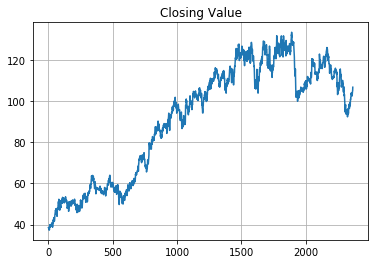

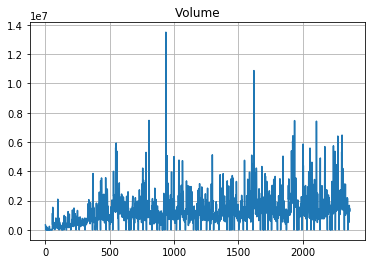

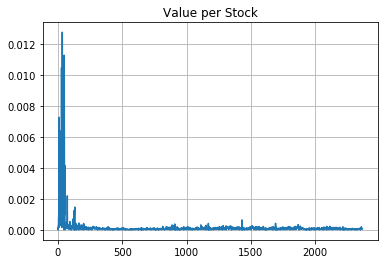

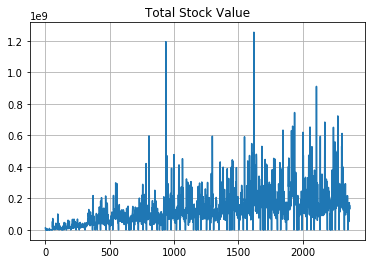

In [5]:
closing_val = np.array(panel_data['Close'])
volume = np.array(panel_data['Volume'])

val_p_vol = np.divide(closing_val,volume,out=np.zeros_like(closing_val),where=volume!=0)
total_val = np.multiply(closing_val,volume)

plt.plot(closing_val)
plt.title('Closing Value')
plt.grid()
plt.show()
plt.plot(volume)
plt.title('Volume')
plt.grid()
plt.show()
plt.plot(val_p_vol)
plt.grid()
plt.title('Value per Stock')
plt.show()
plt.plot(total_val)
plt.grid()
plt.title('Total Stock Value')
plt.show()

In [13]:
train_seg_len = 200

start_date = datetime(2000,1,1)
end_date = datetime(2018,7,25)

seq_len = []

training_data = []
training_labels = []

for ticker in content[0:3]:
    try:
        panel_data = data.DataReader(ticker,'morningstar',start_date,end_date,retry_count=0)
    except ValueError:
        print('Could not retrieve ticker')
        continue
    closing_val = np.array(panel_data['Close'])
    
    c_seq_len = int(np.floor(closing_val.shape[0]/train_seg_len))
    seq_len.append(c_seq_len)
    for k in range(c_seq_len-2):
        training_data.append(closing_val[k*train_seg_len:(k+1)*train_seg_len])
        training_labels.append(closing_val[(k+1)*train_seg_len:(k+2)*train_seg_len])

Could not retrieve ticker
